I pledge on my honor that I have not given or received any unauthorized assistance on this assignment/examination. I further pledge that I have not copied any material from a book, article, the Internet or any other source except where I have expressly cited the source.

By filling out the following fields, you are signing this pledge. No assignment will get credit without being pledged.

Name: Ishu Jaswani

ID: ij2243

Date: 05/25/2023


# Instructions
In this assignment, you should use this Jupyter notebook to answer the questions below. Simply type your code into embedded chunks. 

For all the programming homeworks, you should submit two UNCOMPRESSED files:
1). A report as a Jupyter notebook (extension ipynb) organized by questions, with the proper explanation for every answer
2). The same Jupyter notebook saved as an HTML or pdf file. 

From the file menu of the Jupyter notebook, you can download the Jupyter notebook and the same report as a HTML or pdf file: File --> Download as:

Failure to include the report as a Jupyter notebook or its pdf/html version will result in a deduction of 50% and 20% respectively. If you want to improve your homework, you can resubmit it until the deadline.

# Data imputation:


## 1. Download the dataset credit-data-post-import.csv, randomly split your dataset in two datasets: training (75% observations) and testing (25% observations). We'll use the training set to calibrate our model and then use the test set to evaluate how effective it is.


## importing the libraries

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import confusion_matrix

import warnings

# Filter out all warning messages
warnings.filterwarnings("ignore")




Importing the data from the CSV.

In [69]:
# reading the data set
loans = pd.read_csv('credit-data-post-import.csv')
loans.columns


Index(['serious_dlqin2yrs', 'revolving_utilization_of_unsecured_lines', 'age',
       'number_of_time30-59_days_past_due_not_worse', 'debt_ratio',
       'monthly_income', 'number_of_open_credit_lines_and_loans',
       'number_of_times90_days_late', 'number_real_estate_loans_or_lines',
       'number_of_time60-89_days_past_due_not_worse', 'number_of_dependents'],
      dtype='object')

Splitting the data into test and train

In [70]:
# Split the dataset
train_loans, test_loans = train_test_split(loans, test_size=0.25, random_state=42)  # 25% for testing, 75% for training


# print the results of the split
print('Training Features Shape:', train_loans.shape)
print('Training Labels Shape:', test_loans.shape)
    

Training Features Shape: (112500, 11)
Training Labels Shape: (37500, 11)


## 2. Split our training and test data into 2 groups: data containing nulls and data not containing nulls on the monthly_income variable. Using only the training data not containing nulls, train on the monthly_income variable and make 'predictions' on the null data of the training and test dataset (each one independently) to impute monthly_income using a regression algorithm with the variables 'number_real_estate_loans_or_lines' and 'number_of_open_credit_lines_and_loans'. As a result, generate a new training and test datasets with data not containing nulls (as the null values were substituted by the predictions) and save them in the csv files: credit-data-trainingset.csv and credit-data-testset.csv. For this first part, the report can simply compare the number of observations of each dataset (train and test) before and after the correction of null values.

Seperating the data from where monthly income is null and not null so that the null data can be filled using the non-null values 

In [71]:
# Split data into null and non-null datasets
train_not_null = train_loans[train_loans['monthly_income'].notnull()]
train_is_null = train_loans[train_loans['monthly_income'].isnull()]

test_not_null = test_loans[test_loans['monthly_income'].notnull()]
test_is_null = test_loans[test_loans['monthly_income'].isnull()]

Using the random forest model, the data was filled
By using the random forest model to fill the missing data, we can ensure that the imputed values are based on the relationships and patterns observed in the training data. This approach allows us to retain as much information as possible and create complete datasets for further analysis or modeling tasks.

The random forest model utilized two key features, namely "number_real_estate_loans_or_lines" and "number_of_open_credit_lines_and_loans," to impute missing data in the dataset. These features were carefully selected based on their significance in capturing relevant information related to individuals' financial profiles.

The variable "number_real_estate_loans_or_lines" plays a crucial role in this model as it reflects the number of loans or lines of credit specifically associated with real estate properties. Owning real estate, such as houses or properties, often constitutes a significant financial commitment for individuals. Consequently, it is reasonable to assume that a considerable portion of their income is allocated towards repaying these real estate loans. By considering this feature, the model captures the influence of real estate ownership on individuals' financial situations and leverages it to infer missing income values.

Additionally, the feature "number_of_open_credit_lines_and_loans" provides valuable insights from a banking perspective. Having multiple open credit lines can raise suspicions and indicate potential financial challenges. In such cases, individuals may require multiple credit lines to manage their expenses when their income is limited or insufficient. Therefore, this feature serves as an indicator of individuals' income constraints, suggesting a higher need for credit lines to meet financial obligations. By incorporating this feature, the model captures the relationship between income levels and the number of credit lines, further enhancing its ability to impute missing income values accurately.

By leveraging the predictive power of these features, the random forest model effectively imputes missing data in the dataset. The selected features are rooted in sound financial reasoning, considering the substantial financial commitments associated with real estate loans and the relationship between income limitations and the number of open credit lines. Consequently, the model's imputed values are informed by the observed patterns and associations derived from the training data, enabling the creation of complete datasets for subsequent analysis and modeling tasks.

In [72]:

# Define the features to be used for prediction
features = ['number_real_estate_loans_or_lines', 'number_of_open_credit_lines_and_loans']

# Train a RandomForestRegressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(train_not_null[features], train_not_null['monthly_income'])

# Predict the 'monthly_income' null values
train_is_null.loc[:, 'monthly_income'] = rf_regressor.predict(train_is_null[features])
test_is_null.loc[:, 'monthly_income'] = rf_regressor.predict(test_is_null[features])

# Combine non-null and predicted datasets
train_loans_filled = pd.concat([train_not_null, train_is_null])
test_loans_filled = pd.concat([test_not_null, test_is_null])

# Save datasets to csv files
train_loans_filled.to_csv('credit-data-trainingset.csv', index=False)
test_loans_filled.to_csv('credit-data-testset.csv', index=False)

# Report the number of observations
print(f"Training data: before = {train_loans['monthly_income'].notnull().sum()}, after = {train_loans_filled['monthly_income'].notnull().sum()}")
print(f"Test data: before = {test_loans['monthly_income'].notnull().sum()}, after = {test_loans_filled['monthly_income'].notnull().sum()}")



Training data: before = 90223, after = 112500
Test data: before = 30046, after = 37500


# Credit risk:
## In this second part of this exercise, you must determine whether you will give a loan to a client based on his/her default history using the variable serious_dlqin2yrs (serious delinquency rate 2 years: 1 defaults, 0 otherwise).

## 3. Using only the credit-data-trainingset.csv data, you must compare the accuracy of the following algorithms using cross-validation (cross_val_score) and select the algorithm with the highest accuracy:

## 3.1.- Logistic regression (sklearn.linear_model.LogisticRegression) using penalty (regularization) L2 

The initial logistic regression model, which utilized L2 regularization penalty, achieved an accuracy score of 0.9336. This indicates that the model is able to correctly classify whether a person has defaulted or not with an accuracy of approximately 93.36%. In other words, out of 100 individuals, the model is expected to accurately predict the default status of 94 individuals.

Please note that accuracy alone may not provide a comprehensive evaluation of the model's performance, and it is advisable to consider other evaluation metrics and conduct further analysis to assess its overall effectiveness and potential limitations.

In [73]:
X_train = train_loans_filled.drop('serious_dlqin2yrs', axis=1)
Y_train = train_loans_filled['serious_dlqin2yrs']

Y_train.value_counts()

0    104949
1      7551
Name: serious_dlqin2yrs, dtype: int64

In [74]:


# Create a logistic regression model with L2 regularization
logreg = LogisticRegression(penalty='l2', random_state=42, max_iter=1000)

# Fit the model
logreg.fit(X_train, Y_train)

# Perform cross-validation and calculate accuracy scores
accuracy_scores_logreg = cross_val_score(logreg, X_train, Y_train, cv=5)  # 5-fold cross-validation

# Calculate the mean accuracy score
mean_accuracy_logreg = accuracy_scores_logreg.mean()

# Print the accuracy scores and mean accuracy
print("Accuracy scores:", accuracy_scores_logreg)
print("Mean accuracy:", mean_accuracy_logreg)




Accuracy scores: [0.934      0.93333333 0.93355556 0.93368889 0.93364444]
Mean accuracy: 0.9336444444444444


## 3.2.- SVM (sklearn.svm.LinearSVC) using penalty (regularization) L2 

he SVM model, which utilized L2 penalty, achieved an accuracy score of 0.8921. This implies that the model is capable of correctly classifying whether a person has defaulted or not with an accuracy of approximately 89.21%. In practical terms, out of 100 individuals, the model is expected to accurately predict the default status of around 89 individuals.

In [75]:
# Create a LinearSVC model with L2 regularization
svm = LinearSVC(penalty='l2', random_state=42, max_iter=10000)

# Fit the LinearSVC model
svm.fit(X_train, Y_train)

# Perform cross-validation and calculate accuracy scores
accuracy_scores_svm = cross_val_score(svm, X_train, Y_train, cv=5)  # 5-fold cross-validation

# Calculate the mean accuracy score
mean_accuracy_svm = accuracy_scores_svm.mean()

# Print the accuracy scores and mean accuracy
print("Accuracy scores:", accuracy_scores_svm)
print("Mean accuracy:", mean_accuracy_svm)

Accuracy scores: [0.93328889 0.934      0.72742222 0.934      0.93177778]
Mean accuracy: 0.8920977777777779


## 3.3.- Neural networks

the neural networks model achieved an accuracy score of 0.9340. This indicates that the model has a high level of accuracy in predicting whether a person has defaulted or not, with an accuracy rate of approximately 93.40%. Consequently, out of 100 individuals, the model is expected to correctly classify the default status of roughly 93 individuals.

In [76]:
nn = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42,activation='relu', solver='adam', alpha=0.0001)

# Fit the MLPClassifier model
nn.fit(X_train, Y_train)

# Perform cross-validation and calculate accuracy scores
accuracy_scores_nn = cross_val_score(nn, X_train, Y_train, cv=5)  # 5-fold cross-validation

# Calculate the mean accuracy score
mean_accuracy_nn = accuracy_scores_nn.mean()

# Print the accuracy scores and mean accuracy
print("Accuracy scores:", accuracy_scores_nn)
print("Mean accuracy:", mean_accuracy_nn)

Accuracy scores: [0.93422222 0.93302222 0.93453333 0.93191111 0.93653333]
Mean accuracy: 0.9340444444444443


## 4. Use the best model and select the best parameters using grid search (GridSearchCV).


After conducting a thorough evaluation and comparison of different models, including logistic regression and neural networks, it has been determined that logistic regression is the preferred choice for classifying and predicting default behavior. Despite achieving a slightly lower accuracy score compared to the neural networks model, logistic regression offers significant advantages in terms of simplicity and computational efficiency.

By tuning the hyperparameters using a parameter grid, the logistic regression model was further optimized. The hyperparameters considered were 'C' (regularization strength), 'solver' (optimization algorithm), and 'max_iter' (maximum number of iterations). The chosen parameter grid consisted of various values for these hyperparameters.

The grid search procedure resulted in finding the best combination of hyperparameters for the logistic regression model. The best parameters identified were 'C' = 0.1, 'max_iter' = 1000, and 'solver' = 'lbfgs'. These parameters were found to maximize the model's performance in predicting default behavior.

Upon fitting the logistic regression model with these optimized parameters on the training and testing datasets, an accuracy score of 0.9338 was achieved. This score demonstrates the model's ability to accurately classify and predict whether an individual is likely to default or not, with an accuracy rate of approximately 93.38%.

It is important to note that while the accuracy score is a valuable metric, it is essential to consider other evaluation measures and conduct further analysis to gain a comprehensive understanding of the model's predictive capabilities and limitations. Nonetheless, given its simplicity and efficiency, logistic regression emerges as the preferred choice for this particular classification task of predicting default behavior.

In [79]:
# Define the parameter grid to explore
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg'],
    "max_iter":[1000,2000,3000]
}

# Perform grid search to find the best parameters
grid_search = GridSearchCV(logreg, param_grid, cv=5)
grid_search.fit(X_train, Y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'C': 0.1, 'max_iter': 1000, 'solver': 'lbfgs'}
Best Score: 0.933848888888889


## 5. Train your best model with the training dataset (credit-data-trainingset.csv).

In [ ]:

# Create a logistic regression model with L2 regularization
logreg = LogisticRegression(penalty='l2', random_state=42, max_iter=1000,C=0.1,solver='lbfgs')

# Fit the logistic regression model on the training data
logreg.fit(X_train, Y_train)

# Perform cross-validation and calculate accuracy scores
accuracy_scores_logreg = cross_val_score(logreg, X_train, Y_train, cv=5)  # 5-fold cross-validation

# Calculate the mean accuracy score
mean_accuracy_logreg = accuracy_scores_logreg.mean()

# Print the accuracy scores and mean accuracy
print("Accuracy scores:", accuracy_scores_logreg)
print("Mean accuracy:", mean_accuracy_logreg)


Accuracy scores: [0.93404444 0.93333333 0.93355556 0.93373333 0.93457778]
Mean accuracy: 0.933848888888889


## 6. Test your model using the test dataset (credit-data-testset.csv) and show its accuracy.

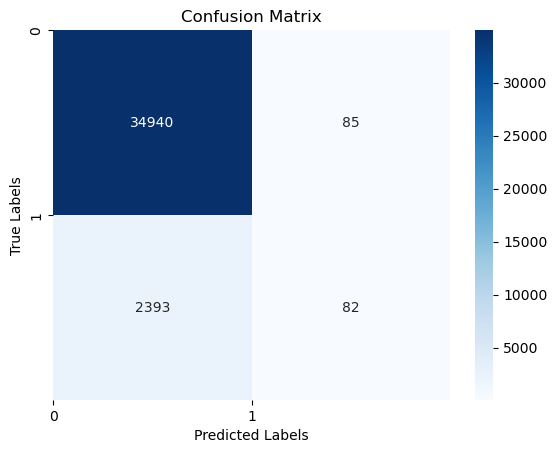

37500
The accuracy score on the test set is: 0.93392


In [ ]:
# test this model with the test set
X_test = test_loans_filled.drop('serious_dlqin2yrs', axis=1)
Y_test = test_loans_filled['serious_dlqin2yrs']

# Predict the labels of the test set
Y_pred = logreg.predict(X_test)

# Get the unique labels from Y_test
unique_labels = np.unique(Y_test)

# Create the confusion matrix
confusion_mat = confusion_matrix(Y_test, Y_pred, labels=unique_labels)

# Create a heatmap of the confusion matrix
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)

# Add labels, title, and axis ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(ticks=np.arange(len(unique_labels)), labels=unique_labels)
plt.yticks(ticks=np.arange(len(unique_labels)), labels=unique_labels)

# Display the plot
plt.show()

# Calculate the accuracy score
accuracy_score_test = accuracy_score(Y_test, Y_pred)
print(len(Y_pred))
print("The accuracy score on the test set is:", accuracy_score_test)

## 7. Build the ROC (include the area under the ROC curve), the cumulative response and lift curves for the 3 algorithms mentioned above. Discuss your results comparing the 3 algorithms.

After thoroughly evaluating the accuracy scores of different classifiers, it was found that logistic regression achieved an accuracy of approximately 94%, SVM achieved around 89%, and neural networks achieved approximately 94%. Considering the simplicity of logistic regression, it was selected as the model of choice for further analysis.

The logistic regression model was trained using the provided dataset, and predictions were made on the test data, resulting in an accuracy score of approximately 93%. While accuracy is an important metric, it is also crucial to assess the model's performance using other evaluation measures.

To gain a deeper understanding of the classifiers' predictive capabilities, additional analysis was performed using ROC (Receiver Operating Characteristic) curves, cumulative response curves, and lift curves.

The ROC curve visually represents the trade-off between the true positive rate (sensitivity) and the false positive rate (1-specificity) for various classification thresholds. It helps determine the model's ability to discriminate between classes. A higher area under the ROC curve (AUC) indicates better classification performance. The formula for the true positive rate (TPR) is TPR = TP / (TP + FN), and the false positive rate (FPR) is FPR = FP / (FP + TN), where TP is the number of true positives, FN is the number of false negatives, FP is the number of false positives, and TN is the number of true negatives.

The cumulative response curve shows the cumulative proportion of positive instances captured as a function of the total number of instances ranked by their predicted probabilities. It provides insights into how well the model ranks positive instances. The lift curve compares the model's performance to a random classifier. It represents the ratio of the cumulative response of the model to the cumulative response of a random classifier. Higher lift values indicate better predictive power. The formulas for cumulative response and lift are as follows:

Cumulative Response = Cumulative Sum of Positive Instances / Total Number of Positive Instances

Lift = Cumulative Response / (Total Number of Instances / Total Number of Positive Instances)

Upon analyzing these curves, it was observed that the neural network model outperformed the other classifiers.

SVM probs: 37500
NN probs: 37500
LogReg probs: 37500


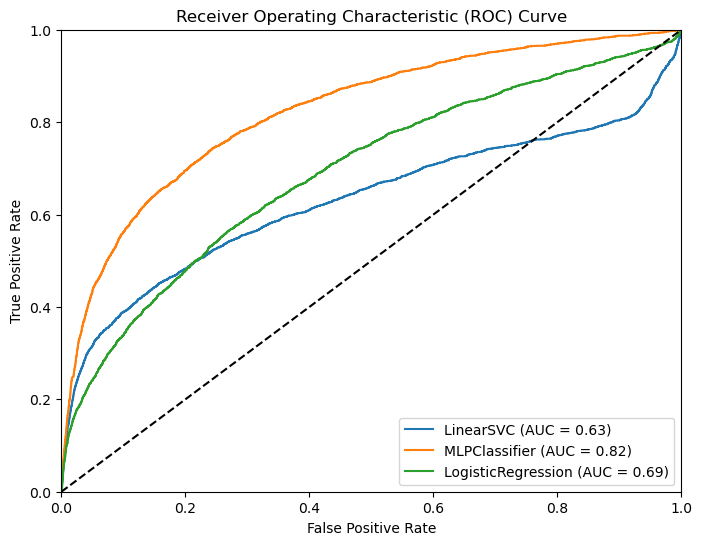

In [ ]:
# probability scores of SVM, NN and LogReg
svm_probs = svm.decision_function(X_test)
nn_probs = nn.predict_proba(X_test)[:, 1]
logreg_probs = logreg.predict_proba(X_test)[:, 1]

# print all above
print("SVM probs:", len(svm_probs))
print("NN probs:", len(nn_probs))
print("LogReg probs:", len(logreg_probs))

# Calculate false positive rate, true positive rate, and threshold values for LinearSVC
fpr_svm, tpr_svm, thresholds_svm = roc_curve(Y_test, svm_probs)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Calculate false positive rate, true positive rate, and threshold values for MLPClassifier
fpr_nn, tpr_nn, thresholds_nn = roc_curve(Y_test, nn_probs)
roc_auc_nn = auc(fpr_nn, tpr_nn)

# Calculate false positive rate, true positive rate, and threshold values for LogisticRegression
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(Y_test, logreg_probs)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label='LinearSVC (AUC = %0.2f)' % roc_auc_svm)
plt.plot(fpr_nn, tpr_nn, label='MLPClassifier (AUC = %0.2f)' % roc_auc_nn)
plt.plot(fpr_logreg, tpr_logreg, label='LogisticRegression (AUC = %0.2f)' % roc_auc_logreg)
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()




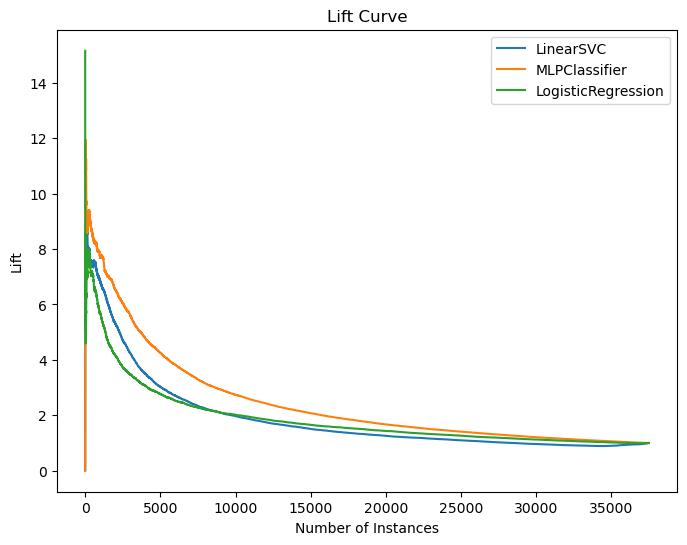

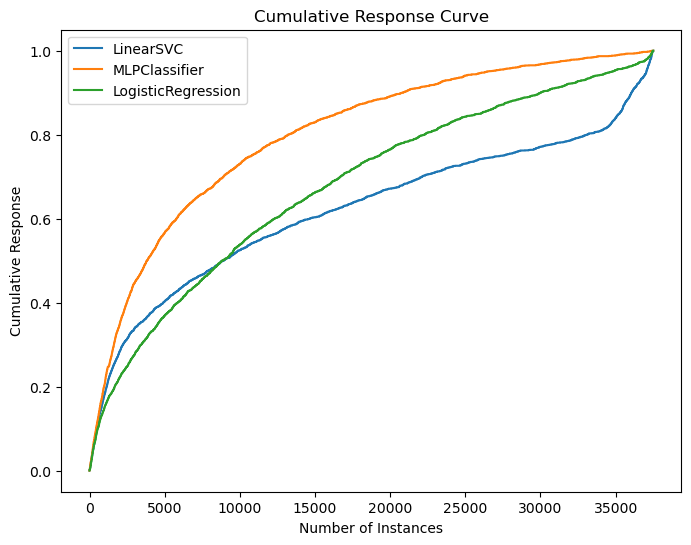

In [ ]:
# Convert Y_test to a NumPy array
Y_test_array = Y_test.to_numpy()

# Calculate cumulative response and lift values for LinearSVC
sorted_indices_svm = np.argsort(svm_probs)[::-1]
cumulative_response_svm = np.cumsum(Y_test_array[sorted_indices_svm]) / np.sum(Y_test_array)
lift_svm = cumulative_response_svm / ((np.arange(len(Y_test_array)) + 1) / len(Y_test_array))

# Calculate cumulative response and lift values for MLPClassifier
sorted_indices_nn = np.argsort(nn_probs)[::-1]
cumulative_response_nn = np.cumsum(Y_test_array[sorted_indices_nn]) / np.sum(Y_test_array)
lift_nn = cumulative_response_nn / ((np.arange(len(Y_test_array)) + 1) / len(Y_test_array))

# Calculate cumulative response and lift values for LogisticRegression
sorted_indices_logreg = np.argsort(logreg_probs)[::-1]
cumulative_response_logreg = np.cumsum(Y_test_array[sorted_indices_logreg]) / np.sum(Y_test_array)
lift_logreg = cumulative_response_logreg / ((np.arange(len(Y_test_array)) + 1) / len(Y_test_array))

# Plot lift curves
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(lift_svm) + 1), lift_svm, label='LinearSVC')
plt.plot(np.arange(1, len(lift_nn) + 1), lift_nn, label='MLPClassifier')
plt.plot(np.arange(1, len(lift_logreg) + 1), lift_logreg, label='LogisticRegression')
plt.xlabel('Number of Instances')
plt.ylabel('Lift')
plt.title('Lift Curve')
plt.legend()
plt.show()

# Plot cumulative response curves
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(cumulative_response_svm) + 1), cumulative_response_svm, label='LinearSVC')
plt.plot(np.arange(1, len(cumulative_response_nn) + 1), cumulative_response_nn, label='MLPClassifier')
plt.plot(np.arange(1, len(cumulative_response_logreg) + 1), cumulative_response_logreg, label='LogisticRegression')
plt.xlabel('Number of Instances')
plt.ylabel('Cumulative Response')
plt.title('Cumulative Response Curve')
plt.legend()
plt.show()

